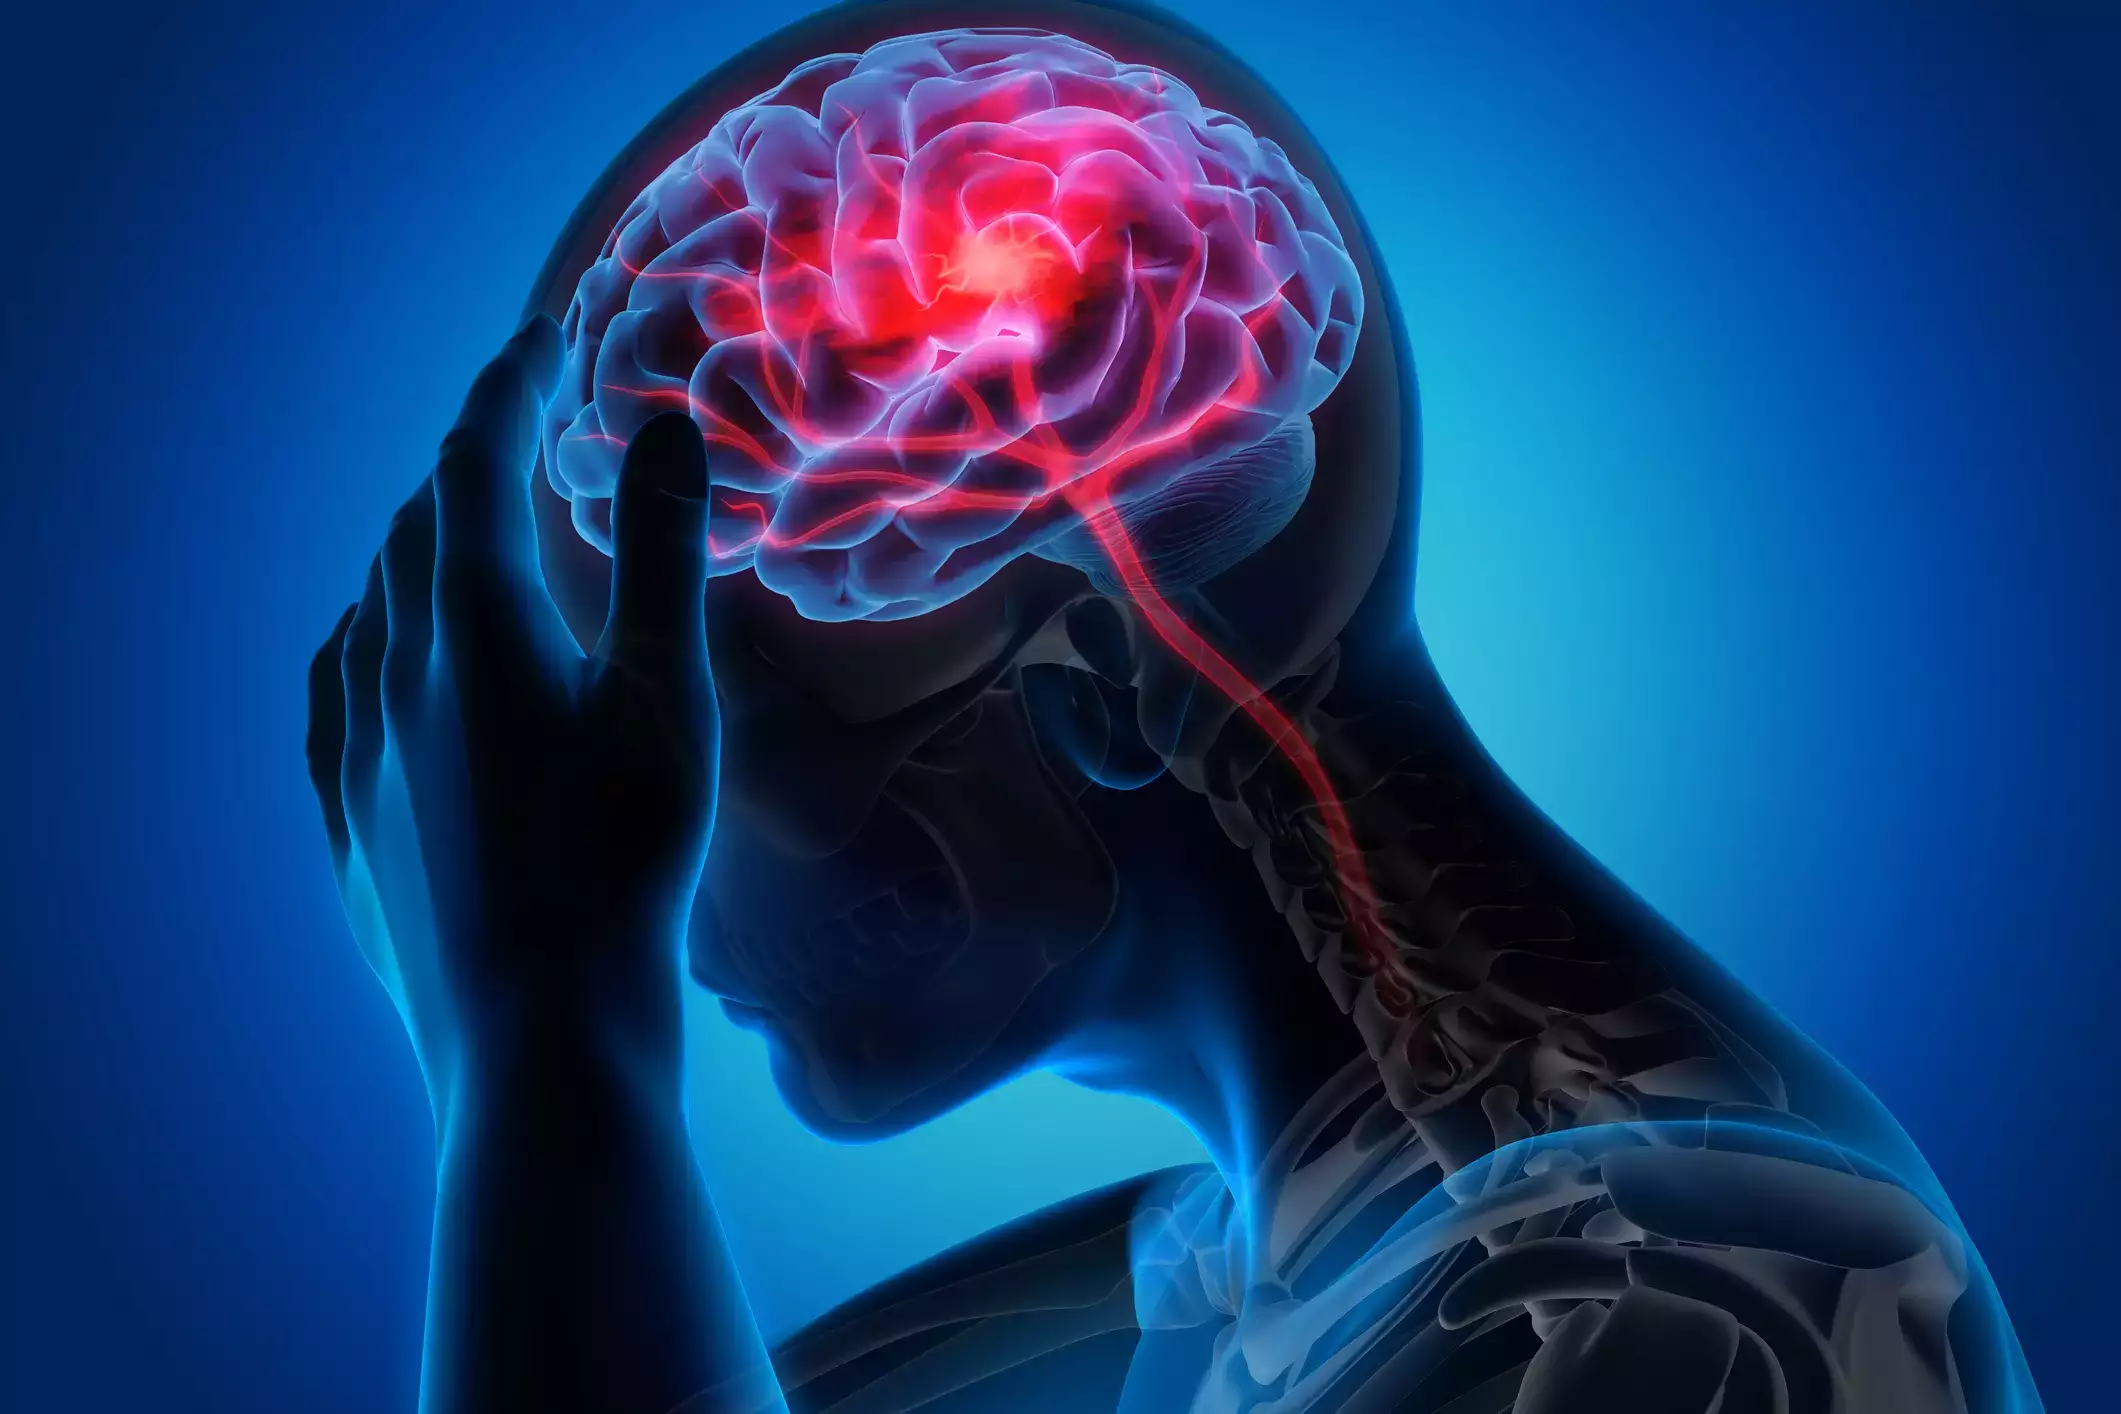


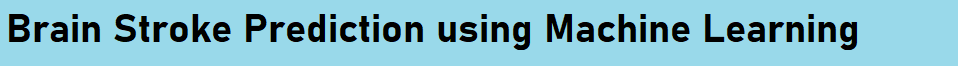

#### The goal of this notebook is to perform some Exploratory Data Analysis on the data and to train a ML model to predict if a person has/is prone to a brain stroke.

Data from kaggle: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

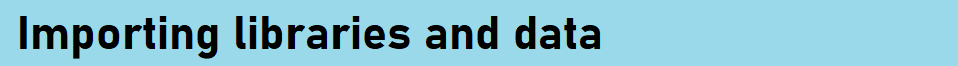

In [73]:
import pandas as pd
import glob                   # file directory 
from tqdm import tqdm          # progress bar
import numpy as np
import seaborn as sns            
import matplotlib.pyplot as plt
import plotly.express as px     
from sklearn.metrics import r2_score, mean_squared_error
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier



from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn import preprocessing


# Importing data base: 

In [74]:
data_base1 = pd.read_csv ("full_data.csv")

In [75]:
df2 = pd.read_csv ("full_filled_stroke_data (1).csv")

In [76]:
data_base1.shape

(4981, 11)

In [77]:
df2.shape

(201, 11)

### Now we add dataframe df2 to data_base1, which will be our working data base.

In [78]:
data_base1 = pd.concat ([data_base1, df2], ignore_index=True )

In [79]:
data_base1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5182 entries, 0 to 5181
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5182 non-null   object 
 1   age                5182 non-null   float64
 2   hypertension       5182 non-null   int64  
 3   heart_disease      5182 non-null   int64  
 4   ever_married       5182 non-null   object 
 5   work_type          5182 non-null   object 
 6   Residence_type     5182 non-null   object 
 7   avg_glucose_level  5182 non-null   float64
 8   bmi                5182 non-null   float64
 9   smoking_status     5182 non-null   object 
 10  stroke             5182 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 445.5+ KB


There are no empty values, good.

In [80]:
data_base1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [81]:
data_base1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5182 entries, 0 to 5181
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5182 non-null   object 
 1   age                5182 non-null   float64
 2   hypertension       5182 non-null   int64  
 3   heart_disease      5182 non-null   int64  
 4   ever_married       5182 non-null   object 
 5   work_type          5182 non-null   object 
 6   Residence_type     5182 non-null   object 
 7   avg_glucose_level  5182 non-null   float64
 8   bmi                5182 non-null   float64
 9   smoking_status     5182 non-null   object 
 10  stroke             5182 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 445.5+ KB


In [82]:
data_base1.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5182.000000,5182.000000,5182.000000,5182.000000,5182.000000,5182.000000
mean,43.754574,0.101505,0.059437,106.749620,28.530705,0.055577
std,22.706994,0.302026,0.236463,45.875281,6.692112,0.229125
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,26.000000,0.000000,0.000000,77.432500,23.900000,0.000000
50%,45.000000,0.000000,0.000000,92.050000,28.300000,0.000000
75%,62.000000,0.000000,0.000000,114.340000,32.500000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [83]:
# checking whether there are duplicates and removing them

data_base1.drop_duplicates()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5177,Male,41.0,0,0,No,Private,Rural,70.15,29.756631,formerly smoked,0
5178,Male,40.0,0,0,Yes,Private,Urban,191.15,31.124172,smokes,0
5179,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.798304,smokes,0
5180,Male,40.0,0,0,Yes,Private,Rural,83.94,29.951301,smokes,0


<AxesSubplot:ylabel='stroke'>

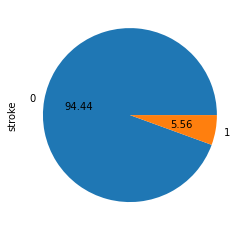

In [84]:
data_base1.stroke.value_counts().plot.pie(autopct="%.2f")

Only 5.56% of the data set have stroke = 1

In [85]:
data_base1.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

There are 4 work_type values

## Checking correlations:

<AxesSubplot:>

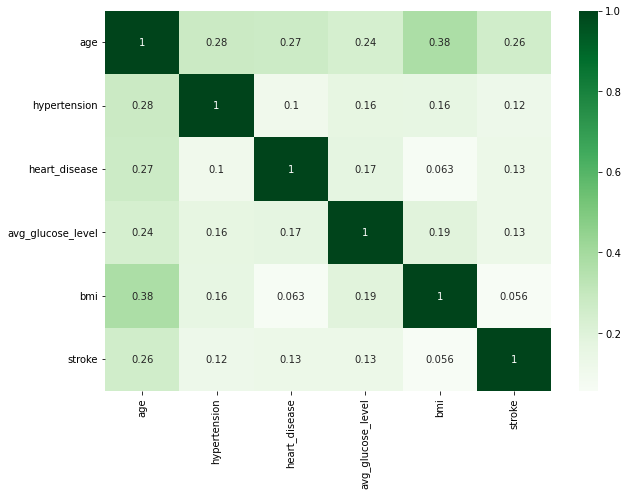

In [86]:
plt.figure(figsize=(10,7))
sns.heatmap(data_base1.corr(), annot = True, cmap = "Greens")

There are no high correlations, which is good, in the sense that all columns/features bring different info, they aren't highly related to each other.

In [87]:
data_base1.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Sunburst Graph:

In [88]:
fig = px.sunburst(data_base1, path=['stroke',  'hypertension', "smoking_status" ], width=700,
    height=700,title='Brain Stroke Prediction',color_discrete_sequence=px.colors.cyclical.Phase)
fig.show()

# Defining functions for outlier analysis 


#### Function for calculating the limits according to the quartile rule

In [89]:

# defining limits according the quartile rule

def limites (coluna):
    q1 = coluna.quantile (0.25)
    q3 = coluna.quantile (0.75)
#     q1 = coluna.sort_values().iloc[int(len(coluna)/4)]
#     q3 = coluna.sort_values().iloc[int (len(coluna)*3/4)]
    amplitude = q3 - q1
    limite_inferior = q1 - 1.5 * amplitude   # lower limit
    limite_superior = q3 + 1.5 * amplitude   # higher limit
    return limite_inferior, limite_superior



#### Function for removing outliers, if necessary

In [90]:
# defining function for removing outliers
# this funcrion returns a df without outliers on that feature, and counts the amount of excluded rows

def excluir_outliers (df, nome_coluna):
    qtde_linhas = len(df)
    lim_inf, lim_sup = limites (df[nome_coluna])
    df = df.loc [(df[nome_coluna] <= lim_sup) & (df[nome_coluna] >= lim_inf)]  # gets only the values between limits
    linhas_removidas =  qtde_linhas - len(df)
    return df, linhas_removidas

# Now defining functions for plotting graphs:

In [91]:
# defining function for Boxplot graph:

def diagrama_caixa (coluna):
    fig, (ax1, ax2) = plt.subplots (1,2)    # for plotting 2 graphs (in 1 line, 2 cols)
    fig.set_size_inches (15,5)
    sns.boxplot (x = coluna, ax = ax1)     # ax1 is the default axis, with all elements
    ax2.set_xlim (limites (coluna))    # calls the "limites" function for calculating the limits for the feature
    sns.boxplot (x = coluna, ax = ax2)
    
    
# defining function for histogram plots:

def histograma (coluna):
    plt.figure (figsize = (15,5))    
    sns.histplot (coluna)   
    
    
def grafico_barra (coluna):
    plt.figure (figsize = (15,5)) 
    ax = sns.barplot (x=coluna.value_counts().index , y=coluna.value_counts()) # plota os valores em função dos índices
    ax.set_xlim (limites(coluna))

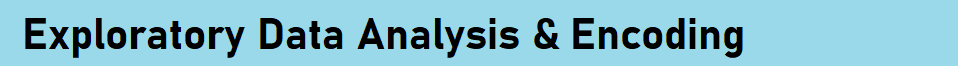

# Analyzing "gender":

<AxesSubplot:>

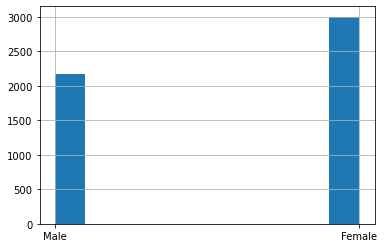

In [92]:
data_base1.gender.hist()

In [94]:
grafico = px.histogram(data_base1, x="gender", color="stroke", color_discrete_map={1: "red", 0: "blue"}, width=400, title = "Stroke by Sex")
# etapa 2: exibir o gráfico
grafico.show()

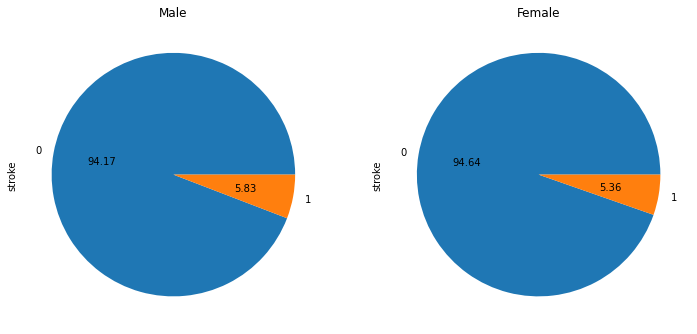

In [95]:
plt.figure(figsize=(12,8))
plt.subplot(121, title="Male")
plot = data_base1[data_base1["gender"]=="Male"].stroke.value_counts().plot.pie(autopct="%.2f", subplots=True)

plt.subplot(122, title="Female")
plot2 = data_base1[data_base1["gender"]=="Female"].stroke.value_counts().plot.pie(autopct="%.2f", subplots=True)
plt.show()

Males are slightly more prone to stroke than females

### We'll make two dummy coluns out of "gender"

In [178]:
data_base1 = pd.get_dummies (data=data_base1, columns=["gender"])

In [179]:
data_base1.head()

,age,hypertension,heart_disease,bmi,stroke,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,newavg,gender_Female,gender_Male
0,67.0,0,1,36.6,1,0,1,0,1,0,0,0,1,0,1,0,0,0.940686,0,1
1,80.0,0,1,32.5,1,0,1,0,1,0,0,1,0,0,0,1,0,0.936925,0,1
2,49.0,0,0,34.4,1,0,1,0,1,0,0,0,1,0,0,0,1,0.939616,1,0
3,79.0,1,0,24.0,1,0,1,0,0,1,0,1,0,0,0,1,0,0.939687,1,0
4,81.0,0,0,29.0,1,0,1,0,1,0,0,0,1,0,1,0,0,0.939961,0,1


Now we have "gender_Female" and "gender_Male" columns (1 or 0)

# Analyzing "ever_married":

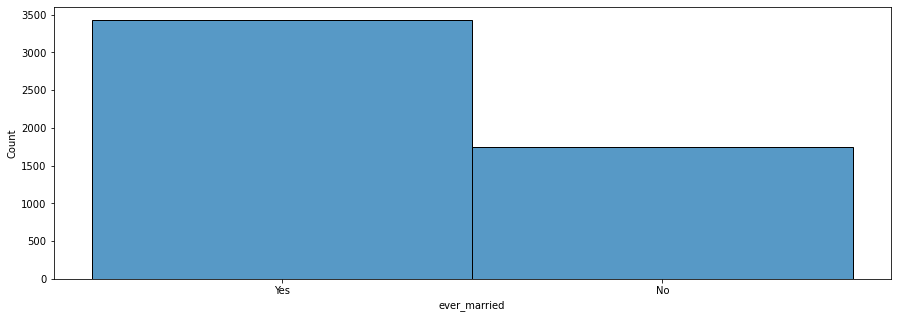

In [68]:
histograma (data_base1["ever_married"])

In [69]:
grafico = px.histogram(data_base1, x="ever_married", color="stroke", color_discrete_map={1: "red", 0: "blue"}, width=400, title = "Stroke by ever_married")
# etapa 2: exibir o gráfico
grafico.show()

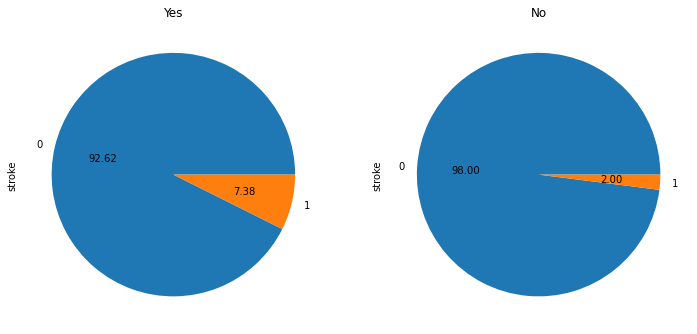

In [96]:
plt.figure(figsize=(12,8))
plt.subplot(121, title="Yes")
plot = data_base1[data_base1["ever_married"]=="Yes"].stroke.value_counts().plot.pie(autopct="%.2f", subplots=True)

plt.subplot(122, title="No")
plot2 = data_base1[data_base1["ever_married"]=="No"].stroke.value_counts().plot.pie(autopct="%.2f", subplots=True)
plt.show()

The prevalence of stroke seems to be higher among people who were married

### We'll make two dummy coluns out of "ever_married"

In [97]:
data_base1 = pd.get_dummies (data=data_base1, columns=["ever_married"])

# Analyzing "work_type"

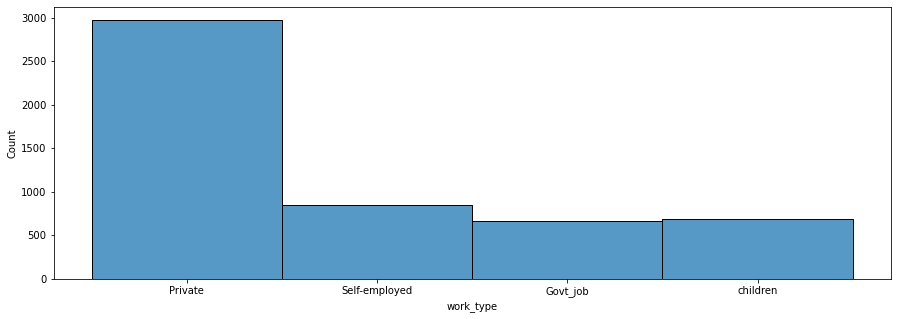

In [98]:
histograma (data_base1["work_type"])

In [99]:
grafico = px.histogram(data_base1, x="work_type", color="stroke", color_discrete_map={1: "red", 0: "blue"}, width=400, title = "Stroke by work_type")
# etapa 2: exibir o gráfico
grafico.show()

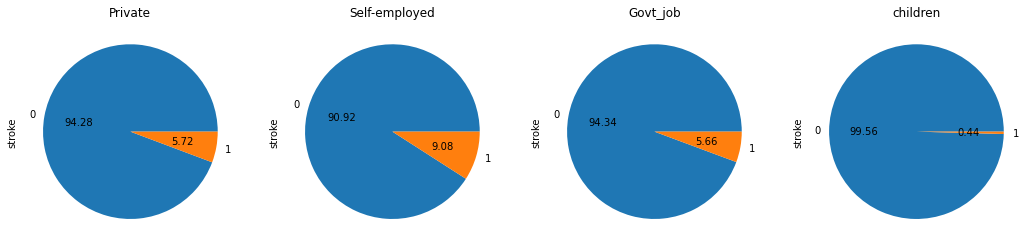

In [108]:
plt.figure(figsize=(18,12))
plt.subplot(141, title="Private")
plot = data_base1[data_base1["work_type"]=="Private"].stroke.value_counts().plot.pie(autopct="%.2f", subplots=True)

plt.subplot(142, title="Self-employed")
plot2 = data_base1[data_base1["work_type"]=="Self-employed"].stroke.value_counts().plot.pie(autopct="%.2f", subplots=True)

plt.subplot(143, title="Govt_job")
plot3 = data_base1[data_base1["work_type"]=="Govt_job"].stroke.value_counts().plot.pie(autopct="%.2f", subplots=True)

plt.subplot(144, title="children")
plot4 = data_base1[data_base1["work_type"]=="children"].stroke.value_counts().plot.pie(autopct="%.2f", subplots=True)



The prevalence of stroke is higher among self-employed people.

### We'll make four dummy columns out of "work_type"

In [109]:
data_base1 = pd.get_dummies (data=data_base1, columns=["work_type"])

# Analyzing Residence_type

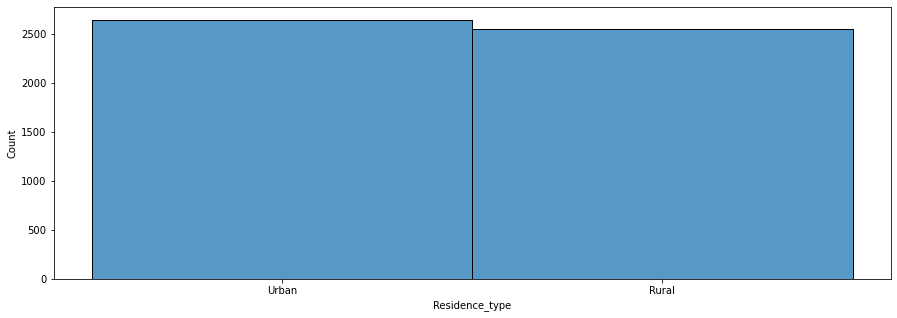

In [110]:
histograma (data_base1["Residence_type"])

In [111]:
grafico = px.histogram(data_base1, x="Residence_type", color="stroke", color_discrete_map={1: "red", 0: "blue"}, width=400, title = "Stroke by Residence_type")
# etapa 2: exibir o gráfico
grafico.show()

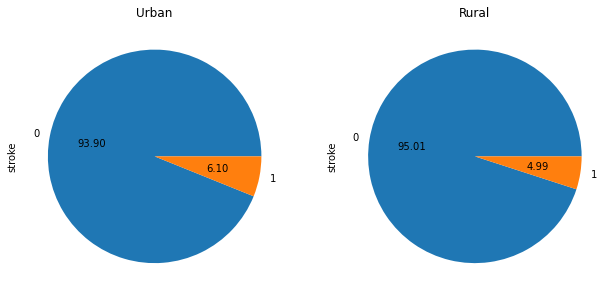

In [117]:
plt.figure(figsize=(22,8))
plt.subplot(141, title="Urban")
plot = data_base1[data_base1["Residence_type"]=="Urban"].stroke.value_counts().plot.pie(autopct="%.2f", subplots=True)

plt.subplot(142, title="Rural")
plot2 = data_base1[data_base1["Residence_type"]=="Rural"].stroke.value_counts().plot.pie(autopct="%.2f", subplots=True)


### We'll make four dummy columns out of "Residence_type"

In [118]:
# getting dummies for "Residence_type" Rural/Urban

data_base1 = pd.get_dummies (data=data_base1, columns=["Residence_type"])

# Analyzing "smoking_status"

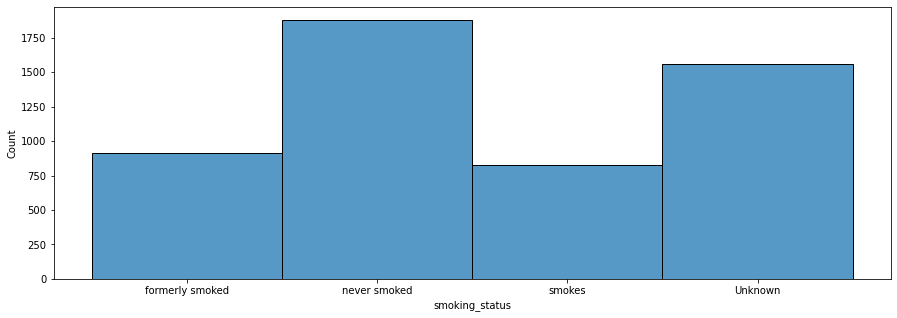

In [119]:
histograma (data_base1["smoking_status"])

In [120]:
grafico = px.histogram(data_base1, x="smoking_status", color="stroke", color_discrete_map={1: "red", 0: "blue"}, width=400, title = "Stroke by smoking_status")
# etapa 2: exibir o gráfico
grafico.show()

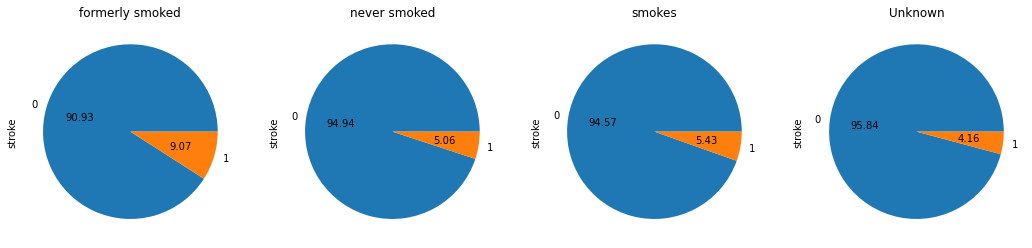

In [125]:
plt.figure(figsize=(18,12))
plt.subplot(141, title="formerly smoked")
plot = data_base1[data_base1["smoking_status"]=="formerly smoked"].stroke.value_counts().plot.pie(autopct="%.2f", subplots=True)

plt.subplot(142, title="never smoked")
plot2 = data_base1[data_base1["smoking_status"]=="never smoked"].stroke.value_counts().plot.pie(autopct="%.2f", subplots=True)

plt.subplot(143, title="smokes")
plot3 = data_base1[data_base1["smoking_status"]=="smokes"].stroke.value_counts().plot.pie(autopct="%.2f", subplots=True)

plt.subplot(144, title="Unknown")
plot4 = data_base1[data_base1["smoking_status"]=="Unknown"].stroke.value_counts().plot.pie(autopct="%.2f", subplots=True)



According to this data, people who formerly smoked are more prone to a stroke.

### We'll make dummy columns out of "smoking_status"

In [127]:
data_base1 = pd.get_dummies(data=data_base1, columns = ["smoking_status"])

# Analyzing age:

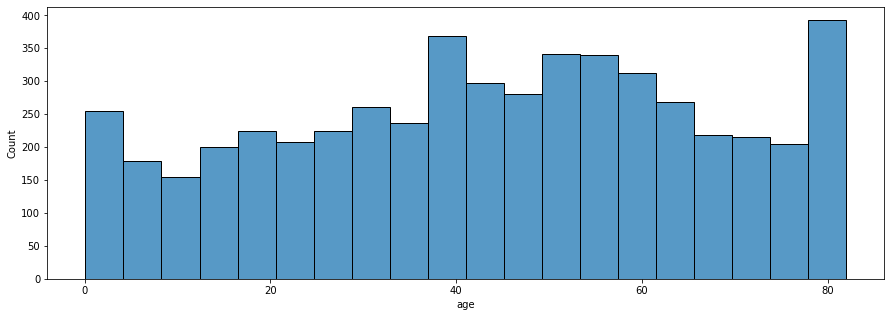

In [128]:
histograma (data_base1.age)

<AxesSubplot:>

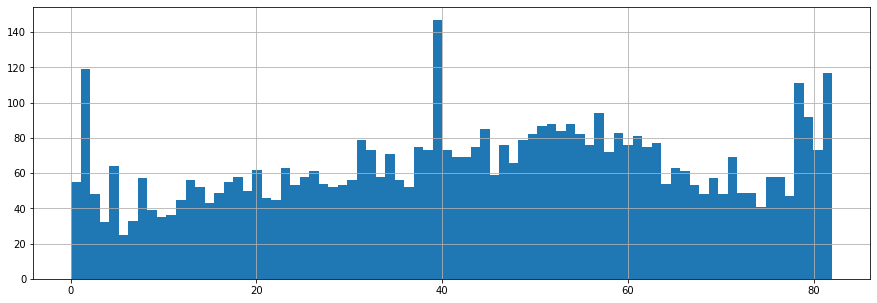

In [129]:
data_base1.age.hist(figsize=(15,5), bins=80)

In [130]:
grafico = px.histogram(data_base1, x="age", color="stroke", color_discrete_map={1: "red", 0: "blue"}, width=900, title = "Stroke by age")
# etapa 2: exibir o gráfico
grafico.show()

In [131]:
data_base1.query ("age < 38 and stroke == 1")

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
148,Female,32.00,0,0,76.13,29.90000,1,0,1,0,1,0,0,1,0,0,0,0,1
205,Female,14.00,0,0,57.93,30.90000,1,1,0,0,0,0,1,1,0,1,0,0,0
4807,Female,1.32,0,0,70.37,18.70000,1,1,0,0,0,0,1,0,1,1,0,0,0
5008,Female,1.32,0,0,70.37,18.71926,1,1,0,0,0,0,1,0,1,1,0,0,0


## Only 4 people under 38 years-old had strokes, and didn't have high bmi nor anything. We should remove those rows, because we want to build a general model, and these cases are more like exceptions.


In [133]:
# removing those 4 rows

data_base1 = data_base1.drop([148, 205, 4807, 5008], axis = 0)

In [134]:
data_base1 = data_base1.reset_index(drop=True)

In [135]:
data_base1.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5178.000000,5178.000000,5178.000000,5178.000000,5178.000000,5178.000000,5178.000000,5178.000000,5178.000000,5178.000000,5178.000000,5178.000000,5178.000000,5178.000000,5178.000000,5178.000000,5178.000000,5178.000000
mean,43.778980,0.101584,0.059482,106.779013,28.533776,0.054847,0.337968,0.662032,0.129587,0.574160,0.163770,0.132484,0.490923,0.509077,0.300888,0.176709,0.362688,0.159714
std,22.696079,0.302129,0.236548,45.880430,6.691804,0.227704,0.473063,0.473063,0.335881,0.494517,0.370102,0.339048,0.499966,0.499966,0.458689,0.381459,0.480822,0.366376
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,0.000000,0.000000,77.460000,23.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,92.095000,28.300000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,62.000000,0.000000,0.000000,114.362500,32.500000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


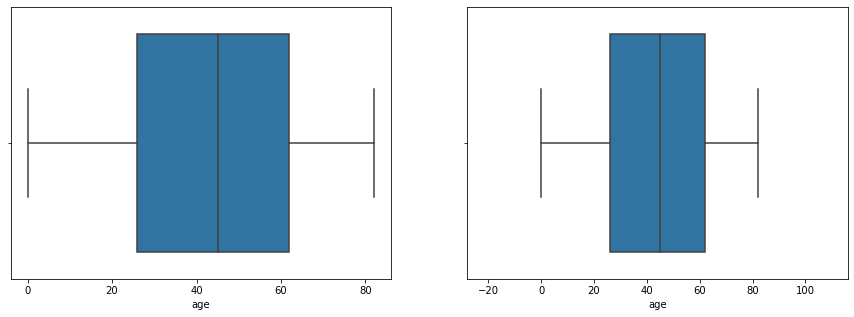

In [138]:
diagrama_caixa(data_base1.age)

There are no outliers.


# Analyzing avg_glucose_level

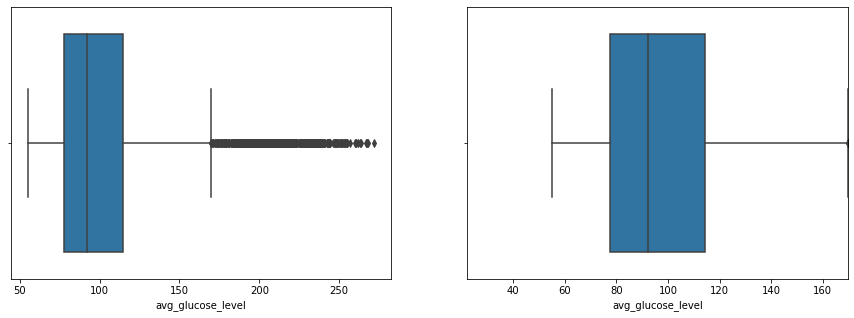

In [139]:
diagrama_caixa (data_base1.avg_glucose_level)

In [141]:
grafico = px.histogram(data_base1, x="avg_glucose_level", color="stroke", color_discrete_map={1: "red", 0: "blue"}, width=900, title = "Stroke by avg_glucose_level")
# etapa 2: exibir o gráfico
grafico.show()

#### Although there are many outliers, with very high glucose level, we won't remove them because they are probably highly related to stroke cases.


## We will now apply Box-Cox to feature "avg_glucose_level", in order to make it more "gaussian", which might favour the model

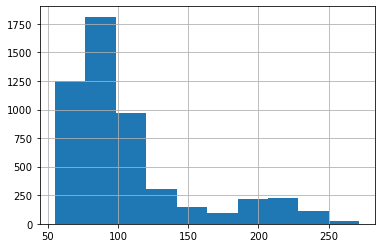

In [148]:
# initial histogram for "avg_glucose_level"

data_base1.avg_glucose_level.hist();

In [144]:
pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)

# lixo = data_base1[["age", "avg_glucose_level", "bmi"]]
aux = data_base1[["avg_glucose_level"]]

aux = pt.fit_transform(aux)
aux = pd.DataFrame(aux)

In [145]:
# data_base1["newage"] = lixo[0]
# data_base1["newavg"] = lixo[1]
# data_base1["newbmi"] = lixo[2]
data_base1["newavg"] = aux


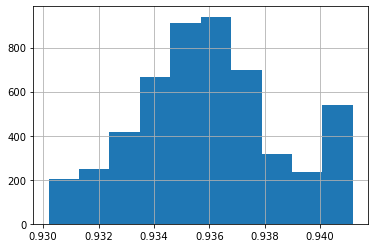

In [149]:
# histogram for the processed "avg_glucose_level". It gets more Gaussian-like

data_base1.newavg.hist();  

The feature gets more gaussian-like (bell shape). Notice that it also became scaled, that is, its range is different

In [157]:
# Now we get rid of the old, original "avg_glucose_level" colum

data_base1 = data_base1.drop(["avg_glucose_level"], axis = 1)
data_base1

,gender,age,hypertension,heart_disease,bmi,stroke,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,newavg
0,Male,67.0,0,1,36.600000,1,0,1,0,1,0,0,0,1,0,1,0,0,0.940686
1,Male,80.0,0,1,32.500000,1,0,1,0,1,0,0,1,0,0,0,1,0,0.936925
2,Female,49.0,0,0,34.400000,1,0,1,0,1,0,0,0,1,0,0,0,1,0.939616
3,Female,79.0,1,0,24.000000,1,0,1,0,0,1,0,1,0,0,0,1,0,0.939687
4,Male,81.0,0,0,29.000000,1,0,1,0,1,0,0,0,1,0,1,0,0,0.939961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5173,Male,41.0,0,0,29.756631,0,1,0,0,1,0,0,1,0,0,1,0,0,0.933233
5174,Male,40.0,0,0,31.124172,0,0,1,0,1,0,0,0,1,0,0,0,1,0.940062
5175,Female,45.0,1,0,31.798304,0,0,1,1,0,0,0,1,0,0,0,0,1,0.936103
5176,Male,40.0,0,0,29.951301,0,0,1,0,1,0,0,1,0,0,0,0,1,0.935040


# Analyzing "bmi"  (body mass index)

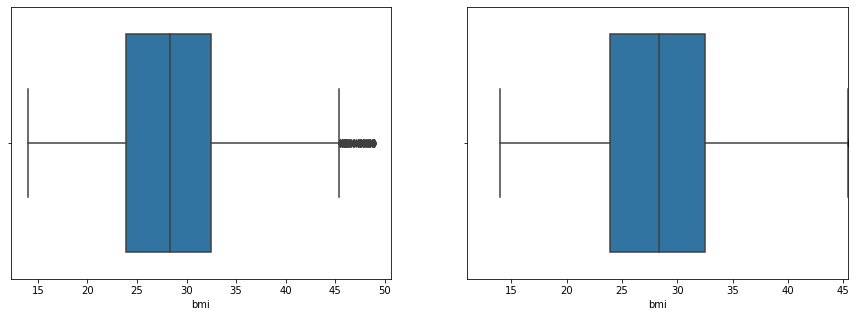

In [150]:
diagrama_caixa (data_base1.bmi)

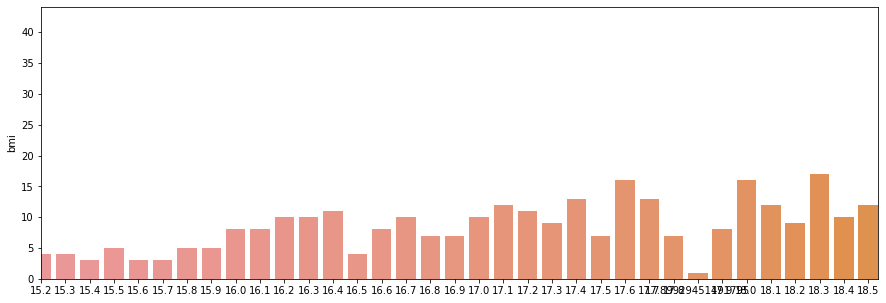

In [151]:
grafico_barra (data_base1.bmi)

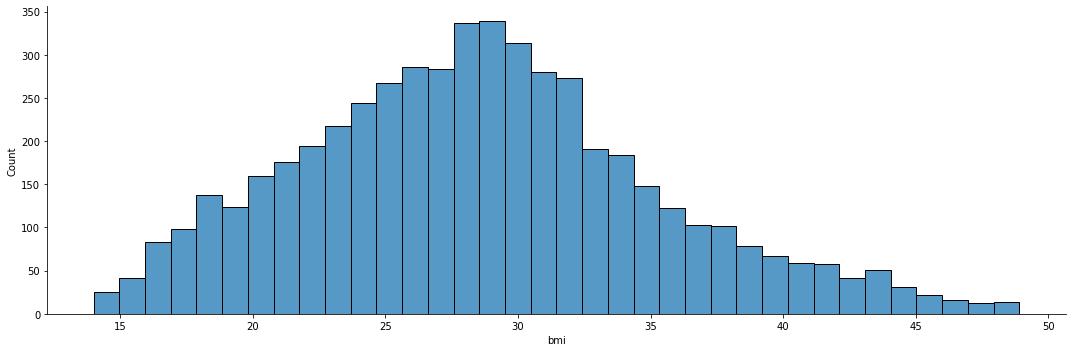

In [152]:
sns.displot(data_base1['bmi'],aspect=3)

In [153]:
grafico = px.histogram(data_base1, x="bmi", color="stroke", color_discrete_map={1: "red", 0: "blue"}, width=900, title = "Stroke by bmi")
# etapa 2: exibir o gráfico
grafico.show()

### This feature (bmi - body mass index) has many outliers. We will opt for keeping them.

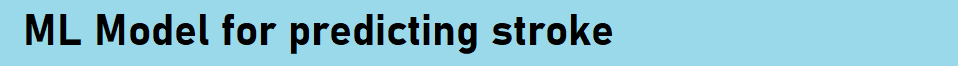

#### We will test the following models:
- RandomForestClassifier
- DecisionTreeClassifier 
- GaussianNaiveBayes
- K-Nearest Neighbours

# Creating the models:

In [158]:
data_base1.stroke.value_counts()

0    4894
1     284
Name: stroke, dtype: int64

In [180]:

model_rfc = RandomForestClassifier(bootstrap=True)      # n_estimators = numero de árvores
                                                                        # bootstrap=False = usa todos os dados pra cada árvore
model_dtc = DecisionTreeClassifier()

model_gnb = GaussianNB()

model_knn = KNeighborsClassifier()



modelos = {"RandomForestClassifier": model_rfc,  "DecisionTreeClassifier": model_dtc, "GaussinaNaiveBayes": model_gnb,
          "K-NearestNeighborsClassifier": model_knn}





## Separating data base into X and y:

In [181]:
# Separating the base into x and y:

y = data_base1.stroke
X = data_base1.drop ("stroke", axis = 1)

##   Scaling "age" and "bmi" 

The features "age" and "bmi" have  different scale than the rest of the databse, which is more or less scaled to 1. This may confuse the ML model, so we'll now scale those two features down.

In [183]:
## Scaling  ---------------------------------------------------------------


# we can use Standard Scaler or MInMax Scaler. We're using the former here.

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# scaler = MinMaxScaler() 
scaler = StandardScaler(with_mean=False)

xxxx = X[["age", "bmi"]]
testelix = scaler.fit_transform (xxxx, y)
testelix = pd.DataFrame(testelix)
X["age"] = testelix[0]
X["bmi"] = testelix[1]




In [184]:
X

,age,hypertension,heart_disease,bmi,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,newavg,gender_Female,gender_Male
0,2.952337,0,1,5.469905,0,1,0,1,0,0,0,1,0,1,0,0,0.940686,0,1
1,3.525178,0,1,4.857156,0,1,0,1,0,0,1,0,0,0,1,0,0.936925,0,1
2,2.159172,0,0,5.141113,0,1,0,1,0,0,0,1,0,0,0,1,0.939616,1,0
3,3.481114,1,0,3.586823,0,1,0,0,1,0,1,0,0,0,1,0,0.939687,1,0
4,3.569243,0,0,4.334078,0,1,0,1,0,0,0,1,0,1,0,0,0.939961,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5173,1.806654,0,0,4.447157,1,0,0,1,0,0,1,0,0,1,0,0,0.933233,0,1
5174,1.762589,0,0,4.651538,0,1,0,1,0,0,0,1,0,0,0,1,0.940062,0,1
5175,1.982913,1,0,4.752287,0,1,1,0,0,0,1,0,0,0,0,1,0.936103,1,0
5176,1.762589,0,0,4.476251,0,1,0,1,0,0,1,0,0,0,0,1,0.935040,0,1


## Separating the data base into train/test bases

## We will use the 'stratify' option in order to obtain roughly the same proportion between the 2 (target) classes in both sets as there is on the whole data_base. 

In [185]:


X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 13 , test_size=0.2, stratify=y) 
                                               


# Imbalance treatment


This is a classic case of imbalanced problem, that is, the target class ("stroke") is higly imbalanced, in the sense that only about 6% of the instances are labeled 1. This is not good for the model, because it might be more prone to predict  0's than it should when applied to real world data afterwards.

To fight this problem, we'll make use of undersampling, that is, a process of removing from the database many instances labeled 0, in order to have in the end an equal amount of 0's and 1's.

(We have also tried the oversampling process, which is quite the opposite, that is, adding new instances labeled 1 until we get a 50-50% ratio, but the oversampling didn't help our model as much as the undersampling did.)

<b>IMPORTANT:</b> The under/oversampling must be applied only to the traing data set, and not to the test one. The test data set should reflect real cases that we would feed the model in order to predict strokes, so it's natural for it to be imbalanced.

In [186]:

from imblearn.under_sampling import RandomUnderSampler


In [187]:
undersample = RandomUnderSampler(sampling_strategy='majority')

In [188]:
X_train, y_train = undersample.fit_resample(X_train, y_train)

In [189]:
pd.DataFrame(y_train).value_counts()

stroke
0         227
1         227
dtype: int64

In [190]:
y_train.shape

(454,)

In [193]:
X_test.shape

(1036, 19)

# Training the models:

In [194]:
pbar = tqdm (total = len(modelos), colour = "blue")
pbar.clear()

for nome_modelo, modelo in modelos.items():
    # treinando:
    modelo.fit (X_train, y_train )
    pbar.update()

pbar.close()


  0%|                                                                                            | 0/4 [00:00<?, ?it/s]
                                                                                                                    
100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 29.74it/s]


## Testing and assessment using classification_reports

In [195]:
 # testando usando a classification_reports:
    
for nome_modelo, modelo in modelos.items():
    print (nome_modelo + " ------------------------------------------")
    previsao = modelo.predict (X_test)
    numprev =  [i for i in previsao if i ==1]
    print (f"stroke=1: {len(numprev)}")
    print (metrics.classification_report(y_test, previsao))
    print ("---" * 30)




RandomForestClassifier ------------------------------------------
stroke=1: 329
              precision    recall  f1-score   support

           0       0.99      0.72      0.83       979
           1       0.16      0.89      0.26        57

    accuracy                           0.73      1036
   macro avg       0.57      0.81      0.55      1036
weighted avg       0.95      0.73      0.80      1036

------------------------------------------------------------------------------------------
DecisionTreeClassifier ------------------------------------------
stroke=1: 310
              precision    recall  f1-score   support

           0       0.98      0.73      0.83       979
           1       0.14      0.74      0.23        57

    accuracy                           0.73      1036
   macro avg       0.56      0.73      0.53      1036
weighted avg       0.93      0.73      0.80      1036

------------------------------------------------------------------------------------------
Gaus

- Precision: % of the 1/0 predictions that were confirmed (true positive/predicted as positive)
- Recall:    % of the actual positive that were rightly predicted/spotted  (true positive/actual positive)
- F1-score: frequently considered the best metrics. f1 = 2 * precision * recall /(precision + recall)   

### Analyzing the Confusion Matrices for the models

The confusion matrix is a great way to analyze the behaviour of a model. It shows the true/false positives/negatives.

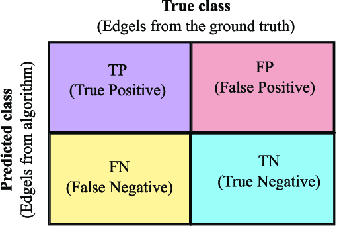

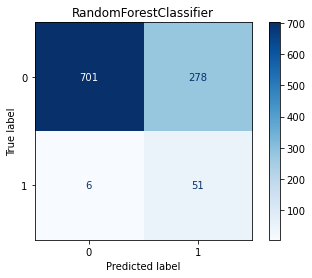

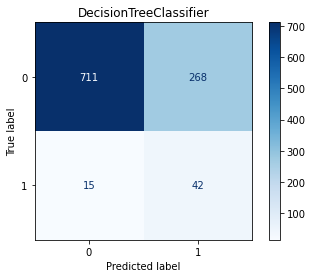

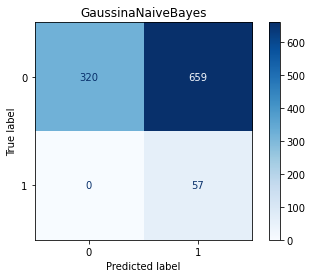

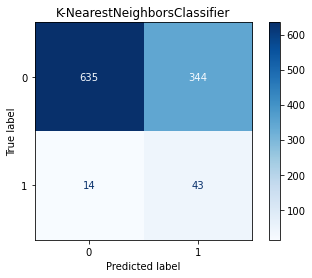

In [201]:
for nome_modelo, modelo in modelos.items():
    disp = ConfusionMatrixDisplay.from_estimator(
    modelo,
    X_test,
    y_test,
#         display_labels=class_names,
    cmap=plt.cm.Blues,
   # normalize=normalize,
)
    disp.ax_.set_title(nome_modelo)


    #print(title)
  #  print(disp.confusion_matrix)

The most promising model seems to be Random Forest. It predicted 51 out of the 57 "stroke" features, but gave 278 false positives.


## Impact Analysis for the Random Forest model:

In [203]:
#x_test = pd.DataFrame(x_test)

In [204]:
impacto_colunas = pd.DataFrame (model_rfc.feature_importances_, X_test.columns)

impacto_colunas.columns = ["impacto"]

impacto_colunas = impacto_colunas.sort_values(by = "impacto", ascending = False)



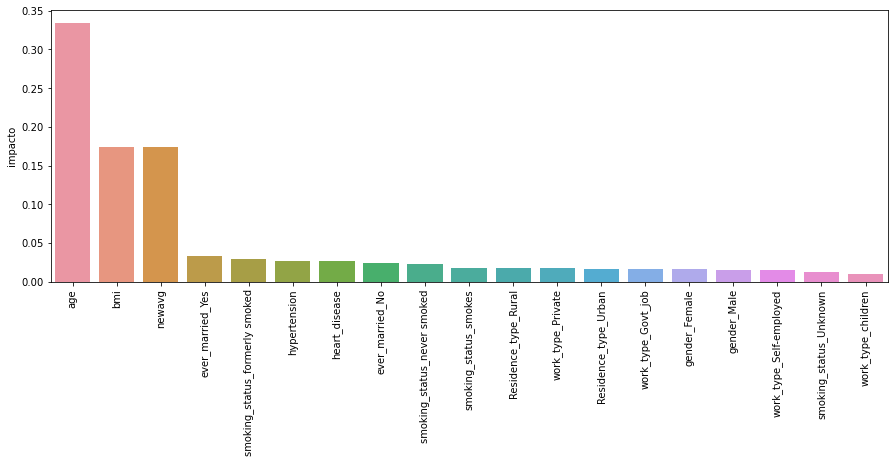

In [205]:

plt.figure (figsize = (15,5)) 
ax = sns.barplot (x=impacto_colunas[:32].index , y=impacto_colunas["impacto"][:32]) # plota os valores em função dos índices
ax.tick_params (axis="x", rotation = 90)
#ax.set_xlim (limites(coluna))

### Note: we have noticed that this impact graph is substantially different if we do not perform the undersampling 


## We will now fine-tune the best 3 models by means of their hyper-parameters.



## Applying GridSearch to the models:

In [207]:
from sklearn.model_selection import GridSearchCV

### Random Forest:

In [208]:
# Random Forest parameters to be tested:

param_grid = [
    {"n_estimators": [80, 90, 100, 110, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 
                      130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148]}]

modelo = RandomForestClassifier(bootstrap=True)

grid_search = GridSearchCV (modelo, param_grid, cv = 5, scoring = "neg_mean_squared_error")
grid_search.fit (X_train, y_train)
grid_search.best_params_

{'n_estimators': 123}

### Decision Tree:

In [209]:
#  decision tree parameters to be tested:

param_grid = [
     {"max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50]}]

modelo = DecisionTreeClassifier()

grid_search = GridSearchCV (modelo, param_grid, cv = 5, scoring = "neg_mean_squared_error")
grid_search.fit (X_train, y_train)
grid_search.best_params_

{'max_depth': 2}

### K-Nearest Neighbours:

In [210]:
# KNN parameters to be tested:

param_grid = [
     {"n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50], "leaf_size": [10, 15, 20, 25, 30, 35, 40, 45]}]

modelo = KNeighborsClassifier()

grid_search = GridSearchCV (modelo, param_grid, cv = 5, scoring = "neg_mean_squared_error")
grid_search.fit (X_train, y_train)
grid_search.best_params_

{'leaf_size': 10, 'n_neighbors': 40}

## Training the models again using the hyper-parameters given by GridSearch:

In [211]:

model_rfc = RandomForestClassifier(n_estimators=123, bootstrap=True)      # n_estimators = numero de árvores
                                                                        # bootstrap=False = usa todos os dados pra cada árvore

model_dtc = DecisionTreeClassifier(max_depth=2)
# model_svc = SVC()


model_knn = KNeighborsClassifier(n_neighbors=40, leaf_size=10)


modelos = {"RandomForestClassifier": model_rfc,  "DecisionTreeClassifier": model_dtc, 
          "K-NearestNeighborsClassifier": model_knn}



In [212]:
pbar = tqdm (total = len(modelos), colour = "blue")
pbar.clear()

for nome_modelo, modelo in modelos.items():
    # treinando:
    modelo.fit (X_train, y_train )
    pbar.update()

pbar.close()


  0%|                                                                                            | 0/3 [00:00<?, ?it/s]
                                                                                                                    
100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 19.69it/s]


# Testing:

In [213]:
 # testando usando a classification_reports:
    
for nome_modelo, modelo in modelos.items():
    print (nome_modelo + " ------------------------------------------")
    previsao = modelo.predict (X_test)
    numprev =  [i for i in previsao if i ==1]
    print (f"stroke=1: {len(numprev)}")
    print (metrics.classification_report(y_test, previsao))
    print ("---" * 30)


RandomForestClassifier ------------------------------------------
stroke=1: 329
              precision    recall  f1-score   support

           0       0.99      0.72      0.83       979
           1       0.16      0.93      0.27        57

    accuracy                           0.73      1036
   macro avg       0.58      0.82      0.55      1036
weighted avg       0.95      0.73      0.80      1036

------------------------------------------------------------------------------------------
DecisionTreeClassifier ------------------------------------------
stroke=1: 424
              precision    recall  f1-score   support

           0       0.99      0.62      0.76       979
           1       0.12      0.91      0.22        57

    accuracy                           0.64      1036
   macro avg       0.56      0.77      0.49      1036
weighted avg       0.94      0.64      0.73      1036

------------------------------------------------------------------------------------------
K-Ne

## Checking Confusion Matrices:

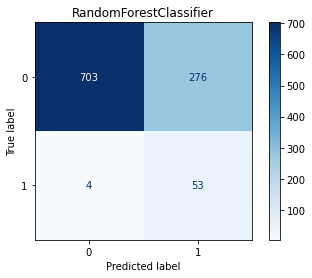

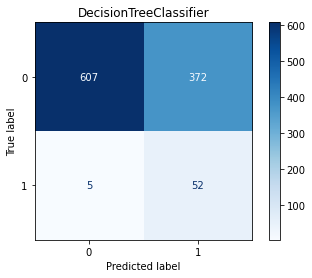

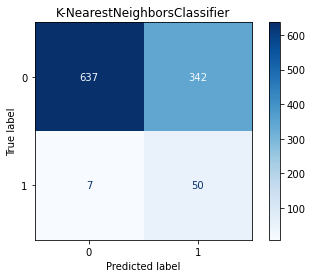

In [214]:
for nome_modelo, modelo in modelos.items():
    disp = ConfusionMatrixDisplay.from_estimator(
    modelo,
    X_test,
    y_test,
#         display_labels=class_names,
    cmap=plt.cm.Blues,
   # normalize=normalize,
)
    disp.ax_.set_title(nome_modelo)

    #print(title)
  #  print(disp.confusion_matrix)

## The best model would be Random Forest. Decision Tree sometimes gets a slightly better recall for stroke, but also provides many more false positives.

# ----------------------------- THE END  -----------------------------------------------------------

## Thank you for reading this notebook. Any comments are more than welcome!